<a href="https://colab.research.google.com/github/dougyd92/ML-Foudations/blob/main/Notebooks/4_Linear_Regression_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Workflow: A Complete Guide



## 1: Introduction and Setup

In this notebook, we'll walk through a complete linear regression workflow. We'll start with a baseline model, evaluate it using multiple metrics, perform residual analysis, apply feature engineering techniques, and explore regularization methods to improve our model.

**Dataset**: We'll use the California Housing dataset, which contains information about housing prices in California districts.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Load the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedianHouseValue')

print("Dataset shape:", X.shape)
print("\nFeatures:", list(X.columns))
print("\nFirst few rows:")
print(X.head())
print("\nTarget statistics:")
print(y.describe())

Dataset shape: (20640, 8)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First few rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target statistics:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedianHouseValue, dtype: float64



## 2: Initial Model: Baseline Linear Regression
Let's start by building a simple linear regression model without any preprocessing. This will serve as our baseline for comparison.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 16512
Test set size: 4128


In [ ]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

print("Baseline model trained successfully!")
print(f"\nModel coefficients:")
for feature, coef in zip(X.columns, baseline_model.coef_):
    print(f"  {feature:15s}: {coef:8.4f}")
print(f"  {'Intercept':15s}: {baseline_model.intercept_:8.4f}")


Baseline model trained successfully!

Model coefficients:
  MedInc         :   0.4487
  HouseAge       :   0.0097
  AveRooms       :  -0.1233
  AveBedrms      :   0.7831
  Population     :  -0.0000
  AveOccup       :  -0.0035
  Latitude       :  -0.4198
  Longitude      :  -0.4337
  Intercept      : -37.0233


In [ ]:

# Make predictions
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)


## 3: Model Evaluation Metrics

### 3.1: R² Score (Coefficient of Determination)
R² measures the proportion of variance in the target variable explained by the model. It ranges from 0 to 1, with 1 being perfect prediction.


In [ ]:
# Calculate R² for both training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training R²: {train_r2:.4f}")
print(f"Test R²:     {test_r2:.4f}")
print(f"\nDifference:  {train_r2 - test_r2:.4f}")

if train_r2 - test_r2 > 0.1:
    print("\nLarge gap suggests potential overfitting")
else:
    print("\nReasonable gap between training and test performance")


Training R²: 0.6126
Test R²:     0.5758

Difference:  0.0368

Reasonable gap between training and test performance


### 3.2: Additional Regression Metrics
Beyond R², we'll look at error-based metrics that measure prediction accuracy in the original units.


In [ ]:
# Calculate additional metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)


In [ ]:

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)


In [ ]:

# Create a summary DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Training': [train_mse, train_rmse, train_mae, train_r2],
    'Test': [test_mse, test_rmse, test_mae, test_r2]
})

print("Model Performance Metrics:")
print(metrics_df.to_string(index=False))
print(f"\nTarget variable range: [{y.min():.2f}, {y.max():.2f}]")
print(f"Average prediction error (MAE): {test_mae:.4f} (≈ ${test_mae*100000:.0f})")

metrics_df


Model Performance Metrics:
Metric  Training     Test
   MSE  0.517933 0.555892
  RMSE  0.719676 0.745581
   MAE  0.528628 0.533200
    R²  0.612551 0.575788

Target variable range: [0.15, 5.00]
Average prediction error (MAE): 0.5332 (≈ $53320)


,Metric,Training,Test
0,MSE,0.517933,0.555892
1,RMSE,0.719676,0.745581
2,MAE,0.528628,0.533200
3,R²,0.612551,0.575788


## 4: Residual Analysis

### 4.1: What Are Residuals?
Residuals are the differences between actual and predicted values: `residual = actual - predicted`

Analyzing residuals helps us check if our model meets the assumptions of linear regression.

In [ ]:
# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

print("Residual Statistics (Test Set):")
print(f"  Mean:     {test_residuals.mean():.6f}  (should be ≈ 0)")
print(f"  Std Dev:  {test_residuals.std():.4f}")
print(f"  Min:      {test_residuals.min():.4f}")
print(f"  Max:      {test_residuals.max():.4f}")


Residual Statistics (Test Set):
  Mean:     0.003479  (should be ≈ 0)
  Std Dev:  0.7457
  Min:      -9.8753
  Max:      4.1484


### 4.2: Residual Plots
Let's visualize the residuals to check for patterns that might indicate problems with our model.

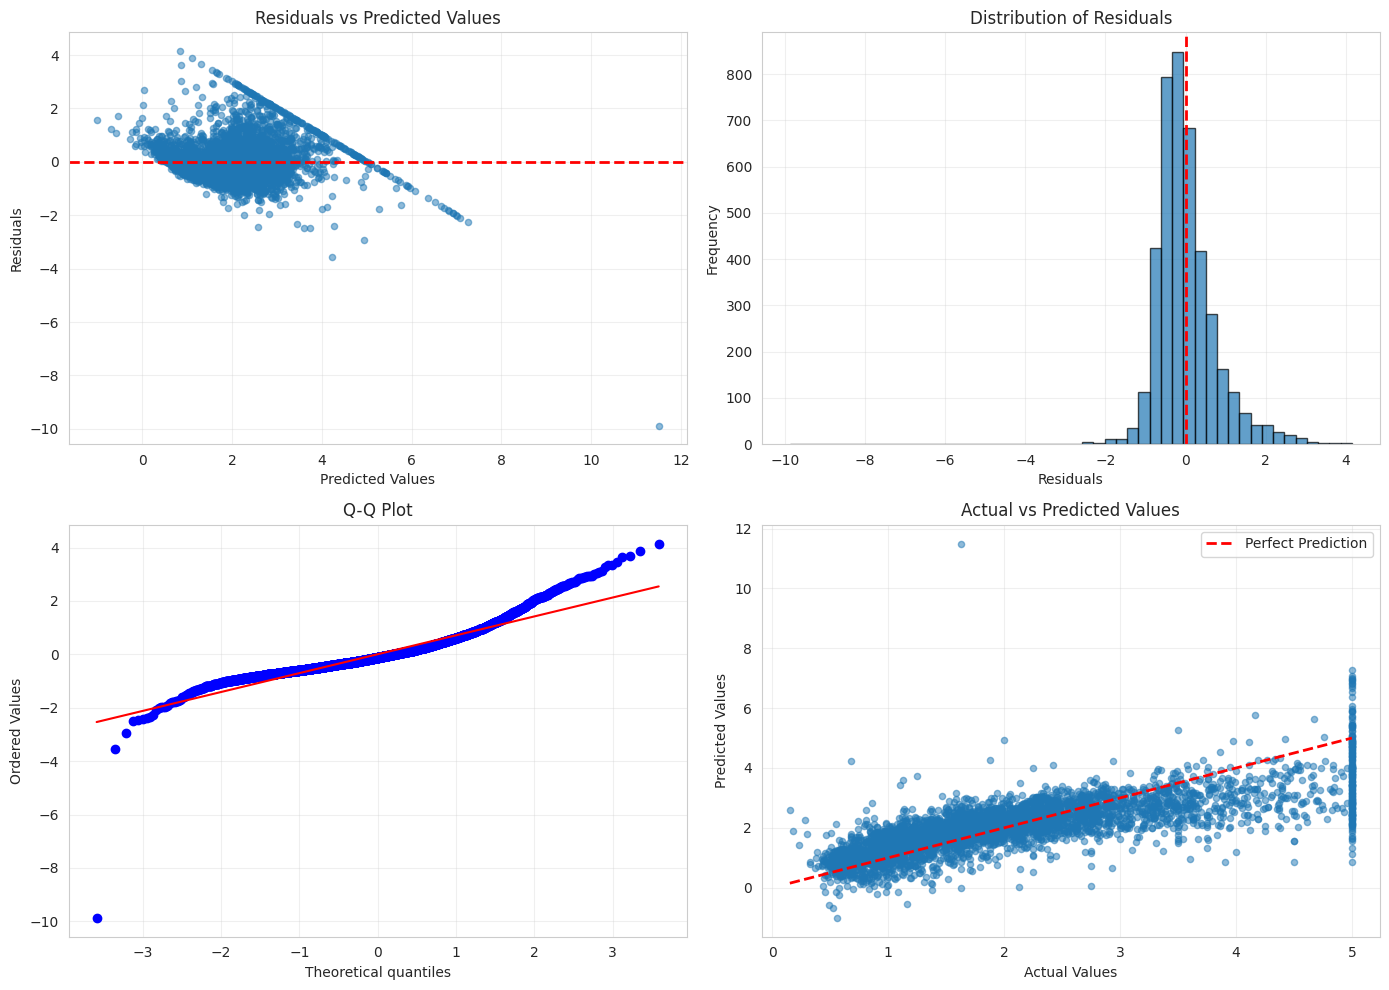

In [ ]:
# Create a comprehensive residual plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuals vs Predicted Values
axes[0, 0].scatter(y_test_pred, test_residuals, alpha=0.5, s=20)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Predicted Values')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution of Residuals (Histogram)
axes[0, 1].hist(test_residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Residuals')
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q Plot (Normal Probability Plot)
from scipy import stats
stats.probplot(test_residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')
axes[1, 0].grid(True, alpha=0.3)

# 4. Actual vs Predicted
axes[1, 1].scatter(y_test, y_test_pred, alpha=0.5, s=20)
axes[1, 1].plot([y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()],
                'r--', linewidth=2, label='Perfect Prediction')
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].set_title('Actual vs Predicted Values')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

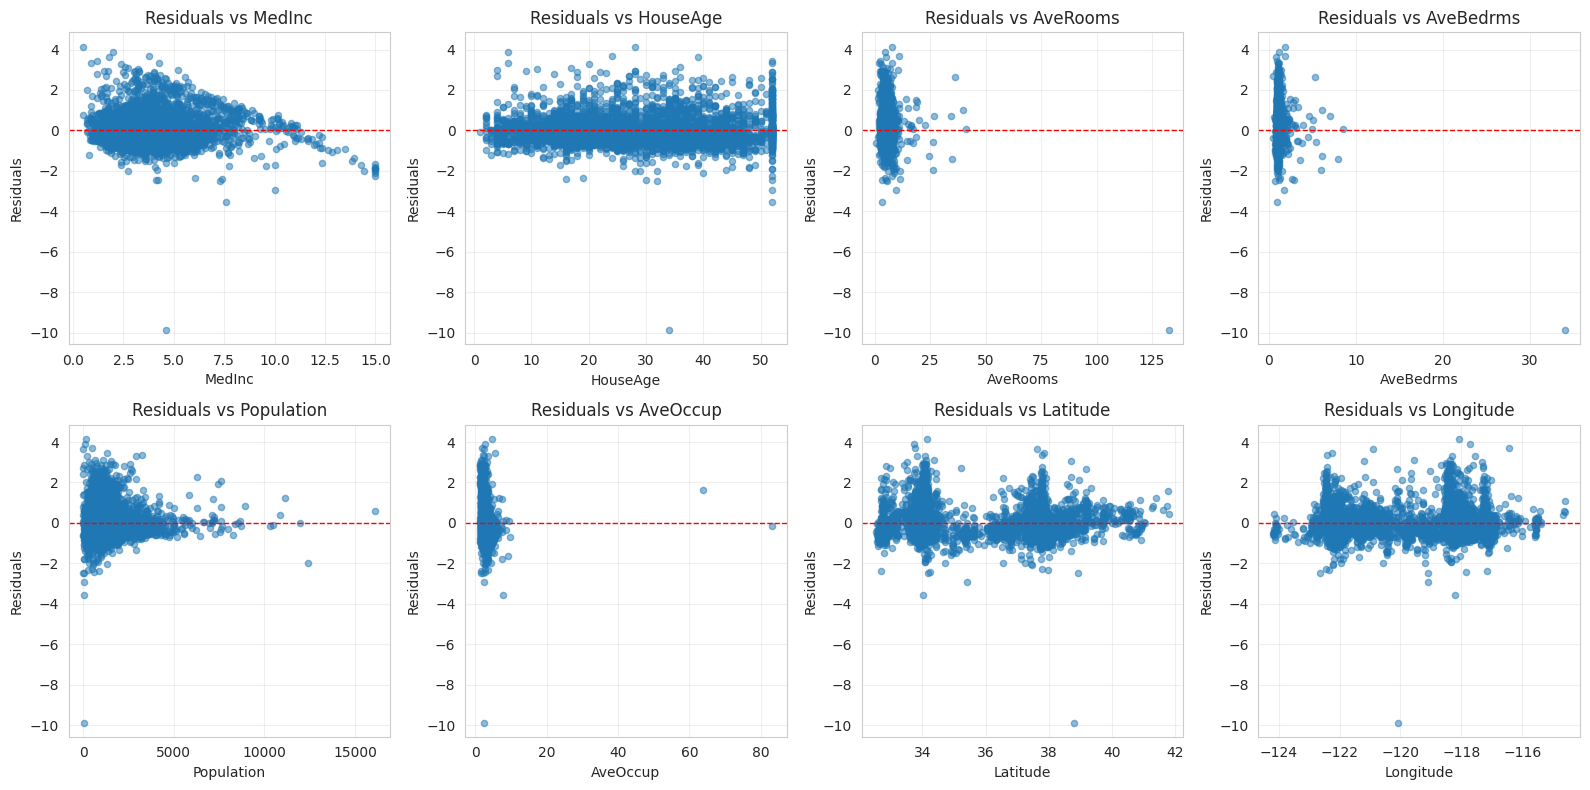

In [ ]:
# Plot residuals vs each feature
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, feature in enumerate(X.columns):
    axes[idx].scatter(X_test[feature], test_residuals, alpha=0.5, s=20)
    axes[idx].axhline(y=0, color='r', linestyle='--', linewidth=1)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Residuals')
    axes[idx].set_title(f'Residuals vs {feature}')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.3: Checking Assumptions
Let's formally check the key assumptions of linear regression:

In [ ]:
# 1. Linearity: already checked with residual plots above

# 2. Homoscedasticity (constant variance)
print("\n1. HOMOSCEDASTICITY")
print("   Check: Residuals should have constant variance across predicted values")
print("   Look at 'Residuals vs Predicted Values' plot above")
print("   PASS if points are randomly scattered around zero line")
print("   FAIL if points show a funnel or pattern")

# 3. Normality of residuals
from scipy.stats import shapiro, normaltest
_, p_value_shapiro = shapiro(test_residuals.sample(min(5000, len(test_residuals))))
print(f"\n2. NORMALITY OF RESIDUALS")
print(f"   Shapiro-Wilk test p-value: {p_value_shapiro:.4f}")
if p_value_shapiro > 0.05:
    print("   Residuals appear normally distributed (p > 0.05)")
else:
    print("   Residuals may not be normally distributed (p < 0.05)")
print("   Also check Q-Q plot above - points should follow the red line")

# 4. Independence - check with Durbin-Watson
from scipy.stats import pearsonr
residuals_array = test_residuals.values
residuals_lag1 = np.roll(residuals_array, 1)[1:]
residuals_current = residuals_array[1:]
autocorr, p_value_autocorr = pearsonr(residuals_lag1, residuals_current)

print(f"\n3. INDEPENDENCE OF RESIDUALS")
print(f"   Autocorrelation: {autocorr:.4f}")
print(f"   p-value: {p_value_autocorr:.4f}")
if abs(autocorr) < 0.1:
    print("   Residuals appear independent")
else:
    print("   Residuals may show some autocorrelation")



1. HOMOSCEDASTICITY
   Check: Residuals should have constant variance across predicted values
   Look at 'Residuals vs Predicted Values' plot above
   PASS if points are randomly scattered around zero line
   FAIL if points show a funnel or pattern

2. NORMALITY OF RESIDUALS
   Shapiro-Wilk test p-value: 0.0000
   Residuals may not be normally distributed (p < 0.05)
   Also check Q-Q plot above - points should follow the red line

3. INDEPENDENCE OF RESIDUALS
   Autocorrelation: -0.0205
   p-value: 0.1888
   Residuals appear independent


## 5: Feature Engineering

### 5.1 Feature Encoding
The original dataset contains only numerical features. To demonstrate feature encoding, let's add a simulated categorical variable representing the area type (urban, suburban, or rural).

In [ ]:
# Add a categorical feature to our data
np.random.seed(42)

# Assign area types based on population density (to make it somewhat realistic)
# Higher density -> more likely to be urban
def assign_area_type(population):
    if population > 2000:
        return np.random.choice(['Urban', 'Suburban', 'Rural'], p=[0.7, 0.25, 0.05])
    elif population > 1000:
        return np.random.choice(['Urban', 'Suburban', 'Rural'], p=[0.3, 0.5, 0.2])
    else:
        return np.random.choice(['Urban', 'Suburban', 'Rural'], p=[0.1, 0.3, 0.6])

X_train_with_cat = X_train.copy()
X_test_with_cat = X_test.copy()

X_train_with_cat['AreaType'] = X_train['Population'].apply(assign_area_type)
X_test_with_cat['AreaType'] = X_test['Population'].apply(assign_area_type)

print("Added categorical feature 'AreaType'")
print("\nValue counts in training set:")
print(X_train_with_cat['AreaType'].value_counts())
print("\nFirst few rows with new feature:")
print(X_train_with_cat[['Population', 'AreaType']].head(10))

Added categorical feature 'AreaType'

Value counts in training set:
AreaType
Suburban    6263
Rural       5398
Urban       4851
Name: count, dtype: int64

First few rows with new feature:
       Population  AreaType
14196      2300.0     Urban
8267       1314.0     Rural
17445       915.0     Rural
14265      1418.0  Suburban
2271        874.0  Suburban
17848      2695.0     Urban
6252       1355.0     Urban
9389        999.0     Rural
6113        819.0     Rural
6061       9427.0  Suburban


**One-Hot Encoding**

One-hot encoding creates binary columns for each category. We'll use `drop='first'` to avoid multicollinearity (the dummy variable trap).


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical columns
categorical_cols = ['AreaType']
numerical_cols = [col for col in X_train_with_cat.columns if col not in categorical_cols]

# Create a preprocessor that handles both types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Fit and transform
X_train_encoded = preprocessor.fit_transform(X_train_with_cat)
X_test_encoded = preprocessor.transform(X_test_with_cat)

# Get feature names after encoding
encoded_feature_names = (
    numerical_cols +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
)

# Convert back to DataFrame for easier handling
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)
print("After One-Hot Encoding:")
print(f"Original features: {X_train_with_cat.shape[1]}")

print(f"Encoded features:  {X_train_encoded.shape[1]}")
print("\nNew feature names:")
print(encoded_feature_names)
print("\nFirst few rows:")
X_train_encoded.head()

After One-Hot Encoding:
Original features: 9
Encoded features:  10

New feature names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'AreaType_Suburban', 'AreaType_Urban']

First few rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AreaType_Suburban,AreaType_Urban
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,0.0,1.0
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,0.0,0.0
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,0.0,0.0
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,1.0,0.0
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,1.0,0.0


In [ ]:
# Train a model with encoded features to see the impact
model_with_encoding = LinearRegression()
model_with_encoding.fit(X_train_encoded, y_train)

y_pred_encoded = model_with_encoding.predict(X_test_encoded)

print("Model Performance with Categorical Feature:")
print(f"  Test R²:   {r2_score(y_test, y_pred_encoded):.4f}")
print(f"  Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_encoded)):.4f}")

# Look at coefficients for the categorical variables
print("\nCoefficients for AreaType categories:")
for feature in encoded_feature_names:
    if 'AreaType' in feature:
        coef = model_with_encoding.coef_[encoded_feature_names.index(feature)]
        print(f"  {feature}: {coef:.4f}")

print("\nNote: 'Rural' is the reference category (dropped to avoid multicollinearity)")

Model Performance with Categorical Feature:
  Test R²:   0.5757
  Test RMSE: 0.7456

Coefficients for AreaType categories:
  AreaType_Suburban: 0.0020
  AreaType_Urban: -0.0029

Note: 'Rural' is the reference category (dropped to avoid multicollinearity)


### 5.2: Interaction Terms and Polynomial Features

**Interaction Terms** capture how the effect of one feature depends on another.

**Polynomial Features** can capture non-linear relationships.


### 5.2.1: Creating Interaction Terms

Let's create an interaction between AreaType and Population to capture how population density affects prices differently in urban vs. suburban vs. rural areas.


In [ ]:
# Create interaction terms manually
# Interaction: AreaType × Population
X_train_interactions = X_train_encoded.copy()
X_test_interactions = X_test_encoded.copy()

# Multiply each AreaType dummy variable by Population
for feature in encoded_feature_names:
    if 'AreaType' in feature:
        interaction_name = f"{feature}_x_Population"
        X_train_interactions[interaction_name] = (
            X_train_encoded[feature] * X_train_encoded['Population']
        )
        X_test_interactions[interaction_name] = (
            X_test_encoded[feature] * X_test_encoded['Population']
        )

print("Interaction terms created:")
interaction_cols = [col for col in X_train_interactions.columns if '_x_' in col]
print(interaction_cols)
print(f"\nNew feature count: {X_train_interactions.shape[1]}")


Interaction terms created:
['AreaType_Suburban_x_Population', 'AreaType_Urban_x_Population']

New feature count: 12


### 5.2.2: Creating Polynomial Terms

Let's add a squared term for HouseAge to capture potential non-linear effects.


In [ ]:
# Add polynomial feature
X_train_interactions['HouseAge_squared'] = X_train_encoded['HouseAge'] ** 2
X_test_interactions['HouseAge_squared'] = X_test_encoded['HouseAge'] ** 2

print("Added polynomial feature: HouseAge_squared")
print(f"Total features: {X_train_interactions.shape[1]}")

# Show the relationship
print("\nExample values:")
sample_df = pd.DataFrame({
    'HouseAge': X_train_interactions['HouseAge'].head(),
    'HouseAge_squared': X_train_interactions['HouseAge_squared'].head()
})
sample_df

Added polynomial feature: HouseAge_squared
Total features: 13

Example values:


,HouseAge,HouseAge_squared
14196,33.0,1089.0
8267,49.0,2401.0
17445,4.0,16.0
14265,36.0,1296.0
2271,43.0,1849.0


In [ ]:
# Train model with interactions and polynomial features
model_with_features = LinearRegression()
model_with_features.fit(X_train_interactions, y_train)

y_pred_features = model_with_features.predict(X_test_interactions)

print("Model Performance Comparison:")
print("=" * 50)
print(f"{'Model':<30} {'Test R²':<10} {'Test RMSE':<10}")
print("=" * 50)
print(f"{'Original':<30} {r2_score(y_test, y_test_pred):<10.4f} {np.sqrt(mean_squared_error(y_test, y_test_pred)):<10.4f}")
print(f"{'With Encoding':<30} {r2_score(y_test, y_pred_encoded):<10.4f} {np.sqrt(mean_squared_error(y_test, y_pred_encoded)):<10.4f}")
print(f"{'With Interactions + Polynomial':<30} {r2_score(y_test, y_pred_features):<10.4f} {np.sqrt(mean_squared_error(y_test, y_pred_features)):<10.4f}")


Model Performance Comparison:
Model                          Test R²    Test RMSE 
Original                       0.5758     0.7456    
With Encoding                  0.5757     0.7456    
With Interactions + Polynomial 0.5778     0.7438    


In [ ]:
# Examine coefficients for new features
print("\nCoefficients for new features:")
print("=" * 60)

# Interaction terms
print("\nInteraction Terms (AreaType × Population):")
for col in interaction_cols:
    idx = list(X_train_interactions.columns).index(col)
    print(f"  {col:<40} {model_with_features.coef_[idx]:>8.4f}")

# Polynomial term
poly_idx = list(X_train_interactions.columns).index('HouseAge_squared')
houseage_idx = list(X_train_interactions.columns).index('HouseAge')
print(f"\nPolynomial Feature:")
print(f"  HouseAge                                 {model_with_features.coef_[houseage_idx]:>8.4f}")
print(f"  HouseAge_squared                         {model_with_features.coef_[poly_idx]:>8.4f}")

print("\nInterpretation:")
print("- Interaction coefficients show how the AreaType effect changes with Population")
print("- The HouseAge_squared coefficient captures curvature in the age-price relationship")


Coefficients for new features:

Interaction Terms (AreaType × Population):
  AreaType_Suburban_x_Population             0.0000
  AreaType_Urban_x_Population                0.0000

Polynomial Feature:
  HouseAge                                  -0.0047
  HouseAge_squared                           0.0002

Interpretation:
- Interaction coefficients show how the AreaType effect changes with Population
- The HouseAge_squared coefficient captures curvature in the age-price relationship


#### 5.2.2.1: **Using PolynomialFeatures (Alternative Approach)**

Scikit-learn provides `PolynomialFeatures` to automatically generate polynomial and interaction terms.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree=2 includes interactions)
# We'll apply this only to numerical features for simplicity
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

# Apply to just the original numerical features
numerical_features = X_train[numerical_cols].values
X_train_poly = poly.fit_transform(numerical_features)
X_test_poly = poly.transform(X_test[numerical_cols].values)

# Get feature names
poly_feature_names = poly.get_feature_names_out(numerical_cols)

print(f"PolynomialFeatures created {X_train_poly.shape[1]} features from {len(numerical_cols)} original features")
print(f"\nThis includes:")
print(f"  - {len(numerical_cols)} original features")
print(f"  - {len(numerical_cols)} squared terms")
print(f"  - {len(numerical_cols) * (len(numerical_cols) - 1) // 2} interaction terms")

print("\nExample feature names:")
print(poly_feature_names[:15])
print("...")
print(poly_feature_names[-5:])

PolynomialFeatures created 44 features from 8 original features

This includes:
  - 8 original features
  - 8 squared terms
  - 28 interaction terms

Example feature names:
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude' 'MedInc^2' 'MedInc HouseAge' 'MedInc AveRooms'
 'MedInc AveBedrms' 'MedInc Population' 'MedInc AveOccup'
 'MedInc Latitude']
...
['AveOccup Latitude' 'AveOccup Longitude' 'Latitude^2'
 'Latitude Longitude' 'Longitude^2']


In [ ]:
# Train model with PolynomialFeatures
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

print("Performance with PolynomialFeatures:")
print(f"  Test R²:   {r2_score(y_test, y_pred_poly):.4f}")
print(f"  Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.4f}")

print("\nWarning: Many features can lead to overfitting!")
print("Regularization becomes even more important with polynomial features.")

Performance with PolynomialFeatures:
  Test R²:   0.6457
  Test RMSE: 0.6814

Regularization becomes even more important with polynomial features.


### 5.3: Feature Scaling
Feature scaling is important for regression, especially when features have different units or ranges. It's also crucial for regularized models.


In [ ]:
# Compare feature scales before scaling
print("Feature Scales (before scaling):")
print(X_train.describe().loc[['mean', 'std', 'min', 'max']])

Feature Scales (before scaling):
         MedInc   HouseAge    AveRooms  AveBedrms    Population     AveOccup  \
mean   3.880754  28.608285    5.435235   1.096685   1426.453004     3.096961   
std    1.904294  12.602499    2.387375   0.433215   1137.056380    11.578744   
min    0.499900   1.000000    0.888889   0.333333      3.000000     0.692308   
max   15.000100  52.000000  141.909091  25.636364  35682.000000  1243.333333   

       Latitude   Longitude  
mean  35.643149 -119.582290  
std    2.136665    2.005654  
min   32.550000 -124.350000  
max   41.950000 -114.310000  


In [ ]:
# Standardization (zero mean, unit variance)
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("\nFeature Scales (after StandardScaler):")
print(X_train_scaled.describe().loc[['mean', 'std', 'min', 'max']])


Feature Scales (after StandardScaler):
            MedInc      HouseAge      AveRooms     AveBedrms    Population  \
mean -6.519333e-17 -9.251859e-18 -1.981081e-16 -1.707291e-16 -2.151595e-19   
std   1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00   
min  -1.775438e+00 -2.190766e+00 -1.904386e+00 -1.762117e+00 -1.251913e+00   
max   5.839268e+00  1.856173e+00  5.716655e+01  5.664727e+01  3.012743e+01   

          AveOccup      Latitude     Longitude  
mean  4.936566e-17  6.400995e-17  1.753335e-15  
std   1.000030e+00  1.000030e+00  1.000030e+00  
min  -2.076846e-01 -1.447697e+00 -2.377207e+00  
max   1.071164e+02  2.951816e+00  2.628794e+00  


In [ ]:
# Train model on scaled features
scaled_model = LinearRegression()
scaled_model.fit(X_train_scaled, y_train)

y_train_pred_scaled = scaled_model.predict(X_train_scaled)
y_test_pred_scaled = scaled_model.predict(X_test_scaled)

# Compare performance
print("Model Comparison: Original vs Scaled Features")
print("=" * 50)
print(f"{'Metric':<15} {'Original':<15} {'Scaled':<15}")
print("=" * 50)
print(f"{'Train R²':<15} {r2_score(y_train, y_train_pred):<15.4f} {r2_score(y_train, y_train_pred_scaled):<15.4f}")
print(f"{'Test R²':<15} {r2_score(y_test, y_test_pred):<15.4f} {r2_score(y_test, y_test_pred_scaled):<15.4f}")
print(f"{'Test RMSE':<15} {np.sqrt(mean_squared_error(y_test, y_test_pred)):<15.4f} {np.sqrt(mean_squared_error(y_test, y_test_pred_scaled)):<15.4f}")

print("\nNote: Linear regression predictions are identical with/without scaling.")
print("However, scaling is ESSENTIAL for regularized models (Ridge, Lasso)!")


Model Comparison: Original vs Scaled Features
Metric          Original        Scaled         
Train R²        0.6126          0.6126         
Test R²         0.5758          0.5758         
Test RMSE       0.7456          0.7456         

Note: Linear regression predictions are identical with/without scaling.
However, scaling is ESSENTIAL for regularized models (Ridge, Lasso)!


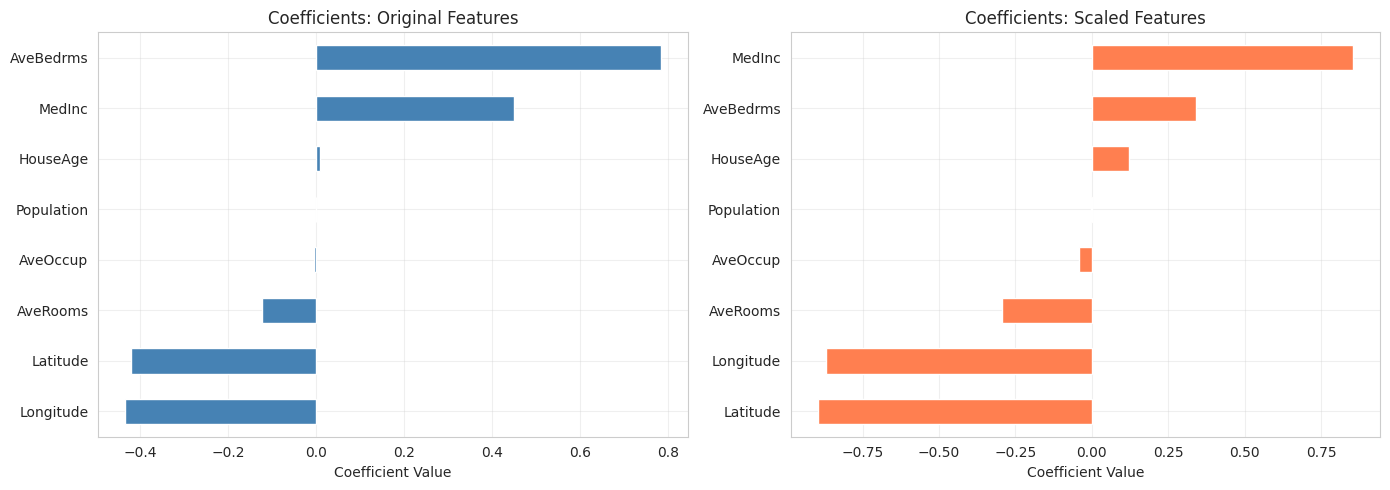


Scaled coefficients show relative importance more clearly!


In [ ]:
# Visualize coefficient magnitudes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Original coefficients
coef_original = pd.Series(baseline_model.coef_, index=X.columns).sort_values()
coef_original.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_xlabel('Coefficient Value')
ax1.set_title('Coefficients: Original Features')
ax1.grid(True, alpha=0.3)

# Scaled coefficients
coef_scaled = pd.Series(scaled_model.coef_, index=X.columns).sort_values()
coef_scaled.plot(kind='barh', ax=ax2, color='coral')
ax2.set_xlabel('Coefficient Value')
ax2.set_title('Coefficients: Scaled Features')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nScaled coefficients show relative importance more clearly!")

## 6: Regularized Regression Models

### 6.1: Why Regularization?
Regularization adds a penalty term to prevent overfitting by shrinking coefficient values. This is especially useful when:
- Features are correlated
- Number of features is large
- Model shows overfitting (large train-test gap)


**Ridge** (L2):  Loss = MSE + α × Σ(coefficients²)

**Lasso** (L1):  Loss = MSE + α × Σ|coefficients|

**Elastic Net**: Loss = MSE + α × [r × Σ|coef| + (1-r) × Σ(coef²)]

Where α (alpha) controls the regularization strength:
  - α = 0: No regularization (ordinary linear regression)
  - α → ∞: Maximum regularization (all coefficients → 0)


### 6.2: Ridge Regression (L2 Regularization)

Ridge regression shrinks coefficients but never sets them exactly to zero.

In [ ]:
# Train Ridge model with default alpha=1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

print("Ridge Regression Performance (α=1.0):")
print(f"  Training R²: {r2_score(y_train, y_train_pred_ridge):.4f}")
print(f"  Test R²:     {r2_score(y_test, y_test_pred_ridge):.4f}")
print(f"  Test RMSE:   {np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)):.4f}")


Ridge Regression Performance (α=1.0):
  Training R²: 0.6126
  Test R²:     0.5758
  Test RMSE:   0.7456



### 6.3: Lasso Regression (L1 Regularization)

Lasso can set coefficients exactly to zero, performing automatic feature selection.


In [ ]:
# Train Lasso model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

print("Lasso Regression Performance (α=0.01):")
print(f"  Training R²: {r2_score(y_train, y_train_pred_lasso):.4f}")
print(f"  Test R²:     {r2_score(y_test, y_test_pred_lasso):.4f}")
print(f"  Test RMSE:   {np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)):.4f}")

# Check which features were selected
n_features_used = np.sum(lasso_model.coef_ != 0)
print(f"\n  Features with non-zero coefficients: {n_features_used}/{len(X.columns)}")





Lasso Regression Performance (α=0.01):
  Training R²: 0.6085
  Test R²:     0.5816
  Test RMSE:   0.7404

  Features with non-zero coefficients: 7/8


In [ ]:
X_train_interactions

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AreaType_Suburban,AreaType_Urban,AreaType_Suburban_x_Population,AreaType_Urban_x_Population,HouseAge_squared
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,0.0,1.0,0.0,2300.0,1089.0
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,0.0,0.0,0.0,0.0,2401.0
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,0.0,0.0,0.0,0.0,16.0
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,1.0,0.0,1418.0,0.0,1296.0
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,1.0,0.0,874.0,0.0,1849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,1.0,0.0,658.0,0.0,1225.0
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43,0.0,1.0,0.0,1753.0,1089.0
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38,0.0,1.0,0.0,1756.0,1296.0
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,0.0,0.0,0.0,0.0,225.0


In [ ]:
# Train Lasso model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_interactions, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_interactions)
y_test_pred_lasso = lasso_model.predict(X_test_interactions)

print("Lasso Regression Performance (α=0.01):")
print(f"  Training R²: {r2_score(y_train, y_train_pred_lasso):.4f}")
print(f"  Test R²:     {r2_score(y_test, y_test_pred_lasso):.4f}")
print(f"  Test RMSE:   {np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)):.4f}")

# Check which features were selected
n_features_used = np.sum(lasso_model.coef_ != 0)
print(f"\n  Features with non-zero coefficients: {n_features_used}/{len(X_train_interactions.columns)}")





Lasso Regression Performance (α=0.01):
  Training R²: 0.6097
  Test R²:     0.5863
  Test RMSE:   0.7362

  Features with non-zero coefficients: 11/13


In [ ]:
lasso_model.coef_

array([ 4.06741975e-01, -3.35012594e-03, -4.65287366e-02,  3.55527956e-01,
       -1.95554196e-05, -3.31300192e-03, -4.08895998e-01, -4.14892969e-01,
        0.00000000e+00, -0.00000000e+00,  1.15748741e-05,  1.71824696e-05,
        2.35784756e-04])


### 6.4: Elastic Net

Elastic Net combines L1 and L2 penalties, offering a balance between Ridge and Lasso.


In [ ]:

# Train Elastic Net model
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

y_train_pred_elastic = elastic_model.predict(X_train_scaled)
y_test_pred_elastic = elastic_model.predict(X_test_scaled)

print("Elastic Net Performance (α=0.01, l1_ratio=0.5):")
print(f"  Training R²: {r2_score(y_train, y_train_pred_elastic):.4f}")
print(f"  Test R²:     {r2_score(y_test, y_test_pred_elastic):.4f}")
print(f"  Test RMSE:   {np.sqrt(mean_squared_error(y_test, y_test_pred_elastic)):.4f}")


Elastic Net Performance (α=0.01, l1_ratio=0.5):
  Training R²: 0.6101
  Test R²:     0.5803
  Test RMSE:   0.7416



Coefficient Comparison:
            Linear   Ridge   Lasso  Elastic Net
MedInc      0.4487  0.8543  0.8010       0.8240
HouseAge    0.0097  0.1226  0.1271       0.1300
AveRooms   -0.1233 -0.2942 -0.1628      -0.2161
AveBedrms   0.7831  0.3390  0.2062       0.2563
Population -0.0000 -0.0023 -0.0000      -0.0000
AveOccup   -0.0035 -0.0408 -0.0306      -0.0359
Latitude   -0.4198 -0.8962 -0.7901      -0.7884
Longitude  -0.4337 -0.8691 -0.7557      -0.7570


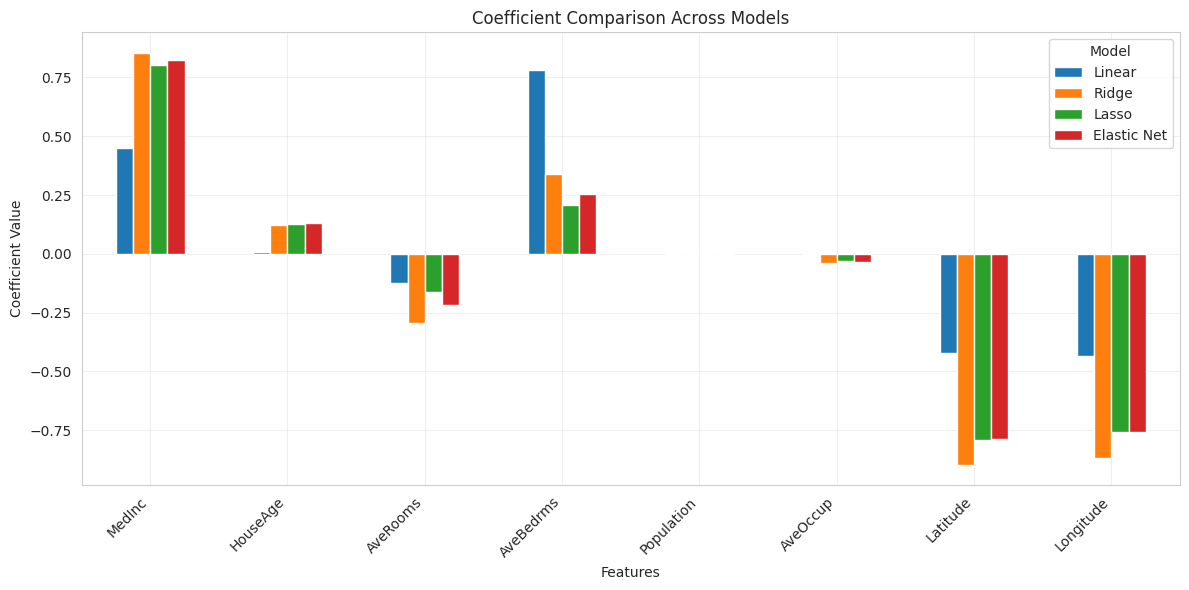

In [ ]:

# Compare coefficients across models
coef_comparison = pd.DataFrame({
    'Linear': baseline_model.coef_,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_,
    'Elastic Net': elastic_model.coef_
}, index=X.columns)

print("\nCoefficient Comparison:")
print(coef_comparison.round(4))

# Visualize
coef_comparison.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Comparison Across Models')
plt.legend(title='Model')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7: Hyperparameter Tuning

### 7.1: The Regularization Parameter (Lambda / aka Alpha)
The regularization strength (λ) is a hyperparameter we need to tune. Let's explore its effect systematically.

Goal: Find the optimal α that balances bias and variance

- Small λ: Model closer to ordinary linear regression (may overfit)
- Large λ: Strong regularization (may underfit)

We'll use cross-validation to find the best λ value.

In Python, alpha (α) is often used instead, as 'lambda' is a reserved word in Python, but the meaning is the same.

### 7.2: Manual Tuning

Let's manually test different alpha values to see their effect.

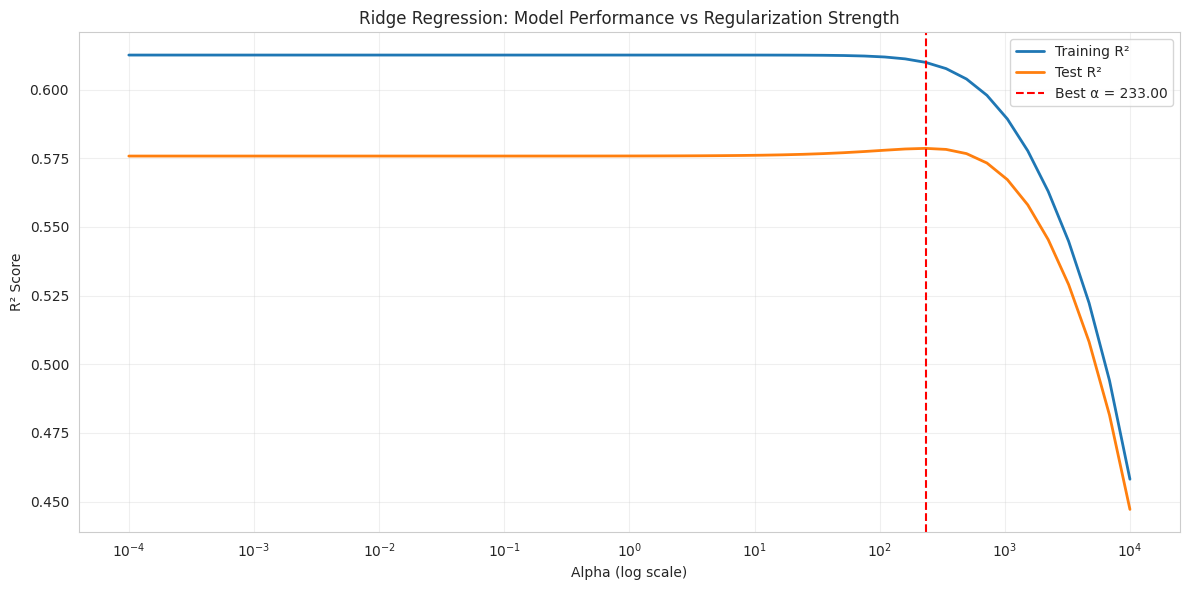

Best alpha from manual search: 232.9952
Best test R²: 0.5786


In [ ]:
# Test a range of alpha values
alphas = np.logspace(-4, 4, 50)
train_scores = []
test_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)

    train_scores.append(r2_score(y_train, model.predict(X_train_scaled)))
    test_scores.append(r2_score(y_test, model.predict(X_test_scaled)))

# Plot the results
plt.figure(figsize=(12, 6))
plt.semilogx(alphas, train_scores, label='Training R²', linewidth=2)
plt.semilogx(alphas, test_scores, label='Test R²', linewidth=2)
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('Ridge Regression: Model Performance vs Regularization Strength')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axvline(x=alphas[np.argmax(test_scores)], color='red',
            linestyle='--', label=f'Best α = {alphas[np.argmax(test_scores)]:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Best alpha from manual search: {alphas[np.argmax(test_scores)]:.4f}")
print(f"Best test R²: {max(test_scores):.4f}")


### 7.3: Cross-Validation for Tuning
Cross-validation provides a more robust way to select hyperparameters.


In [ ]:
# Grid Search for Ridge
param_grid = {'alpha': np.logspace(-4, 4, 100)}

ridge_grid = GridSearchCV(
    Ridge(),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

ridge_grid.fit(X_train_scaled, y_train)

print("Ridge Regression - Grid Search Results:")
print(f"  Best alpha: {ridge_grid.best_params_['alpha']:.4f}")
print(f"  Best CV R²: {ridge_grid.best_score_:.4f}")
print(f"  Test R²:    {ridge_grid.score(X_test_scaled, y_test):.4f}")


Ridge Regression - Grid Search Results:
  Best alpha: 0.0001
  Best CV R²: 0.6115
  Test R²:    0.5758


In [ ]:
# Grid Search for Lasso
lasso_grid = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

lasso_grid.fit(X_train_scaled, y_train)

print("Lasso Regression - Grid Search Results:")
print(f"  Best alpha: {lasso_grid.best_params_['alpha']:.4f}")
print(f"  Best CV R²: {lasso_grid.best_score_:.4f}")
print(f"  Test R²:    {lasso_grid.score(X_test_scaled, y_test):.4f}")


Lasso Regression - Grid Search Results:
  Best alpha: 0.0006
  Best CV R²: 0.6115
  Test R²:    0.5765


In [ ]:
# Using built-in cross-validation: RidgeCV and LassoCV
alphas_cv = np.logspace(-4, 4, 100)

ridge_cv = RidgeCV(alphas=alphas_cv, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

lasso_cv = LassoCV(alphas=alphas_cv, cv=5, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

print("Built-in CV Methods:")
print(f"\nRidgeCV:")
print(f"  Best alpha: {ridge_cv.alpha_:.4f}")
print(f"  Test R²:    {ridge_cv.score(X_test_scaled, y_test):.4f}")

print(f"\nLassoCV:")
print(f"  Best alpha: {lasso_cv.alpha_:.4f}")
print(f"  Test R²:    {lasso_cv.score(X_test_scaled, y_test):.4f}")

Built-in CV Methods:

RidgeCV:
  Best alpha: 0.0001
  Test R²:    0.5758

LassoCV:
  Best alpha: 0.0006
  Test R²:    0.5765


### 7.4: Comparing Tuned Models
Let's compare all our tuned models side-by-side.

In [ ]:
# Collect all models
models = {
    'Linear Regression': scaled_model,
    'Ridge (GridSearch)': ridge_grid.best_estimator_,
    'Lasso (GridSearch)': lasso_grid.best_estimator_,
    'Ridge (RidgeCV)': ridge_cv,
    'Lasso (LassoCV)': lasso_cv
}

# Evaluate each model
results = []
for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    results.append({
        'Model': name,
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Test MAE': mean_absolute_error(y_test, y_pred_test)
    })

results_df = pd.DataFrame(results)
print("Model Comparison:")
print(results_df.to_string(index=False))

# Highlight best model
best_model_idx = results_df['Test R²'].idxmax()
print(f"\n Best Model: {results_df.loc[best_model_idx, 'Model']}")
print(f"   Test R² = {results_df.loc[best_model_idx, 'Test R²']:.4f}")

Model Comparison:
             Model  Train R²  Test R²  Test RMSE  Test MAE
 Linear Regression  0.612551 0.575788   0.745581  0.533200
Ridge (GridSearch)  0.612551 0.575788   0.745581  0.533200
Lasso (GridSearch)  0.612534 0.576487   0.744967  0.533159
   Ridge (RidgeCV)  0.612551 0.575788   0.745581  0.533200
   Lasso (LassoCV)  0.612534 0.576487   0.744967  0.533159

 Best Model: Lasso (GridSearch)
   Test R² = 0.5765


In [ ]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² comparison
results_df.plot(x='Model', y=['Train R²', 'Test R²'],
                kind='bar', ax=axes[0], rot=45)
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score Comparison')
axes[0].legend(['Train R²', 'Test R²'])
axes[0].grid(True, alpha=0.3)

# Error metrics comparison
results_df.plot(x='Model', y=['Test RMSE', 'Test MAE'],
                kind='bar', ax=axes[1], rot=45)
axes[1].set_ylabel('Error')
axes[1].set_title('Error Metrics Comparison')
axes[1].legend(['RMSE', 'MAE'])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8: Final Model Evaluation
Let's do a thorough evaluation of our best model.


In [ ]:
# Use the best model from above
final_model = lasso_cv

In [ ]:
# Get predictions
y_train_final = final_model.predict(X_train_scaled)
y_test_final = final_model.predict(X_test_scaled)

print("=" * 60)
print("FINAL MODEL EVALUATION")
print("=" * 60)
print(f"\nModel: Ridge Regression with α = {final_model.alpha_:.4f}")
print(f"\nPerformance Metrics:")
print(f"  Training R²:  {r2_score(y_train, y_train_final):.4f}")
print(f"  Test R²:      {r2_score(y_test, y_test_final):.4f}")
print(f"  Test RMSE:    {np.sqrt(mean_squared_error(y_test, y_test_final)):.4f}")
print(f"  Test MAE:     {mean_absolute_error(y_test, y_test_final):.4f}")
print(f"\nGeneralization Gap: {r2_score(y_train, y_train_final) - r2_score(y_test, y_test_final):.4f}")


FINAL MODEL EVALUATION

Model: Ridge Regression with α = 0.0006

Performance Metrics:
  Training R²:  0.6125
  Test R²:      0.5765
  Test RMSE:    0.7450
  Test MAE:     0.5332

Generalization Gap: 0.0360


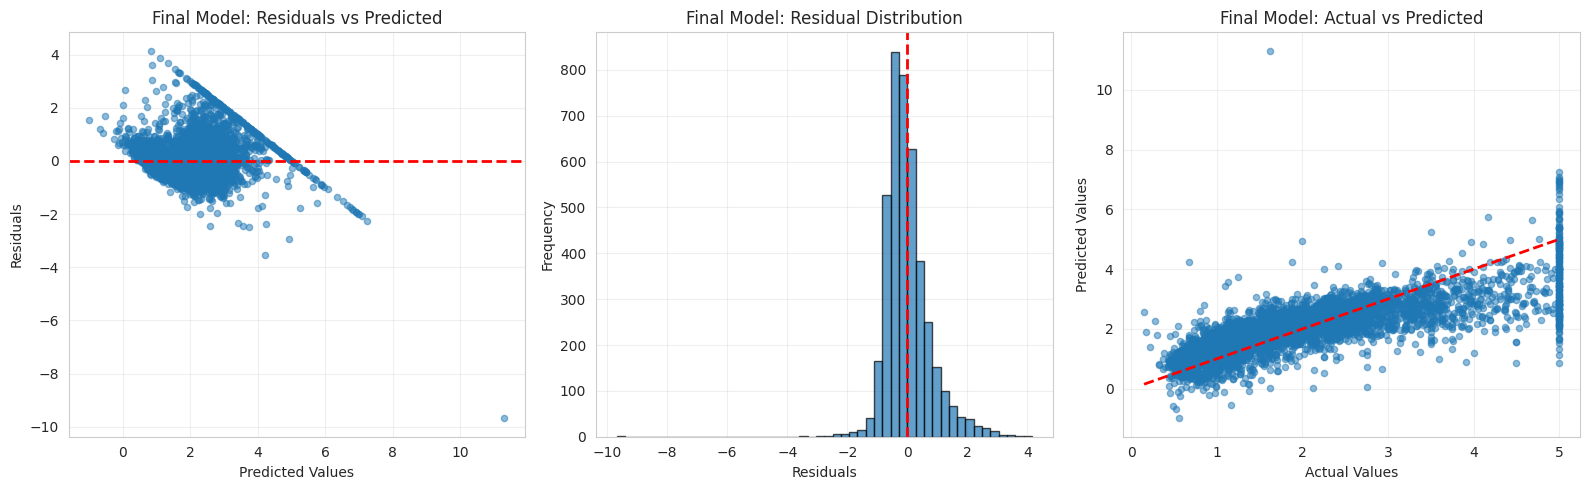

In [ ]:
# Final residual analysis
final_residuals = y_test - y_test_final

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Residuals vs Predicted
axes[0].scatter(y_test_final, final_residuals, alpha=0.5, s=20)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Final Model: Residuals vs Predicted')
axes[0].grid(True, alpha=0.3)

# Residual distribution
axes[1].hist(final_residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Final Model: Residual Distribution')
axes[1].grid(True, alpha=0.3)

# Actual vs Predicted
axes[2].scatter(y_test, y_test_final, alpha=0.5, s=20)
axes[2].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', linewidth=2)
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predicted Values')
axes[2].set_title('Final Model: Actual vs Predicted')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Feature importance (absolute coefficient values)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': final_model.coef_,
    'Abs_Coefficient': np.abs(final_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance (based on absolute coefficient values):")
print(feature_importance.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Final Model: Feature Coefficients')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9: Summary and Best Practices
**Key Takeaways:**

1. **Always start with a baseline** - Simple linear regression provides a reference point for comparison.

2. **Multiple metrics matter** - Don't rely on R² alone. Use RMSE, MAE, and residual analysis together.

3. **Residual analysis is crucial** - It reveals whether model assumptions hold and where the model struggles.

4. **Feature scaling is essential for regularization** - Ridge and Lasso require scaled features for fair penalization.

5. **Regularization prevents overfitting** - Ridge and Lasso add penalties that improve generalization.

6. **Cross-validation for hyperparameter tuning** - Never tune on the test set; use CV to find optimal α.

7. **Balance bias and variance** - Too little regularization → overfitting; too much → underfitting.





**Workflow Recap:**

1. Load data & split into train/test
2. Build baseline model
3. Evaluate with multiple metrics
4. Perform residual analysis
5. Apply feature scaling
6. Try regularized models (Ridge, Lasso, Elastic Net)
7. Tune hyperparameters with cross-validation
8. Select best model based on test performance
9. Final evaluation and interpretation


**Common Pitfalls to Avoid:**

- **Forgetting to scale features** before regularization
- **Using test set for hyperparameter tuning** (use CV instead)
- **Ignoring residual patterns** that violate assumptions
- **Overfitting to training data** without regularization
- **Not checking for multicollinearity** among features
- **Comparing models trained on different data** (always use same train/test split)